In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.set_option('display.max_columns', 35)

In [5]:
df_date = pd.read_excel("Data DS Cotton Plus.xlsx", sheet_name = "BD")

In [15]:
df_date.head()

,Cedula,Nombre Completo,Segmento,Compro 2019?,Compro 2020?,Monto Comprado 2019?,Nro Transacciones 2019,Monto Comprado 2020,Nro Transacciones 2020,Tipo de Contacto,Es Contactable,Ciudad de Residencia,Mail,Direccion,Genero,Estado Civil,Fecha Nacimiento,...,Frecuencia (Cantidad items comprados),Direccion Valido?,Mail Valido?,Cel Valido?,Tel Ofc Valid?,Tel Casa Valido?,Telefono Movil,TelefonoOficina,Telefono Casa,Monto - MARCA COTTON- B/quilla.,Monto - Brand Store Cucuta,Monto - MARCA COTTON- Bucaramanga,Monto - MARCA COTTON- Manizales,Monto - MARCA COTTON- Pereira,Monto - MARCA COTTON- Cartagena,Monto - MARCA COTTON- Pasto,Monto - MARCA COTTON- Cable Plaza
0,1,Nombre Cliente 1,Aficionados,Si,No,264800,2,0,0,11001,Si,BUCARAMANGA,nan,nan,Mujer,No hay informacion,19000225,...,6,Si,Si,No,No,Si,nan,nan,nan,0,0,0,0,0,0,0,0
1,2,Nombre Cliente 2,Esporádicos,Si,No,179900,1,0,0,11001,Si,BARRANQUILLA,nan,nan,Hombre,No hay informacion,19561016,...,1,Si,Si,No,No,Si,nan,nan,nan,179900,0,0,0,0,0,0,0
2,3,Nombre Cliente 3,Aficionados,Si,No,189800,2,0,0,11101,Si,BARRANQUILLA,nan,nan,Mujer,No hay informacion,19550707,...,13,Si,Si,Si,No,Si,nan,nan,nan,451200,0,0,0,0,0,0,0
3,4,Nombre Cliente 4,Aficionados,Si,No,65900,1,0,0,11001,Si,MANIZALES,nan,nan,Mujer,No hay informacion,19620520,...,17,Si,Si,No,No,Si,nan,nan,nan,0,0,0,0,0,0,0,1859600
4,5,Nombre Cliente 5,Aficionados,Si,No,238800,2,0,0,11101,Si,FLORIDABLANCA,nan,nan,Mujer,No hay informacion,19660709,...,5,Si,Si,Si,No,Si,nan,nan,nan,0,0,0,0,0,0,0,0


In [16]:
Dato_1= df_date["Monto Comprado 2019?"].unique()

In [20]:
Dato_2 = df_date.loc[:, "Monto Comprado 2020"].unique()

In [ ]:
##Como referencia - codigo encontrado en la web

##Tome como datos a clasificar el monto de las compras en 2019,2020, respecto a su numero son identificados 0,1,2,3,4 o 5

##Este algoritmo es como el algoritmo "el vecino mas cercano", mide los datos y en el grupo mas cercano, alli lo coloca,
## es un metodo de clasifico utilizado con muchos mas datos, ademas deben de establecer los grupos antes, para que el algoritmo,
##puede medir y colocarlo en el grupo mas cercano.

In [28]:
df = pd.DataFrame({
    'x1': Dato_1,
    'x2': Dato_2
})
df.head()

,x1,x2
0,0,0
1,118930,118930
2,110220,110220
3,148800,148800
4,267800,267800


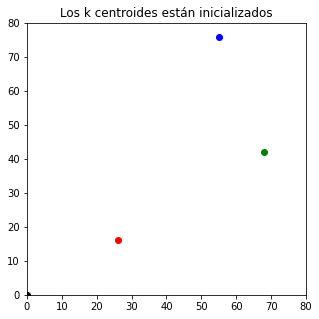

In [29]:
np.random.seed(200)
# Número de centroides k = 3
k = 3
# Inicializamos los centroides a valores aleatorios en el espacio de datos
centroids = {
    i+1: [np.random.randint(0, 80), np.random.randint(0, 80)]
    for i in range(k)
}
     
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x1'], df['x2'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Los k centroides están inicializados')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

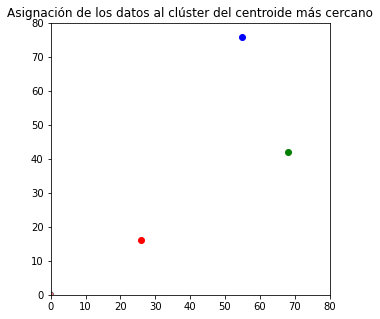

In [30]:
def asignacion(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - c1)^2 - (x2 - c2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x1'] - centroids[i][0]) ** 2
                + (df['x2'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
 
df = asignacion(df, centroids)
 
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x1'], df['x2'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Asignación de los datos al clúster del centroide más cercano')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

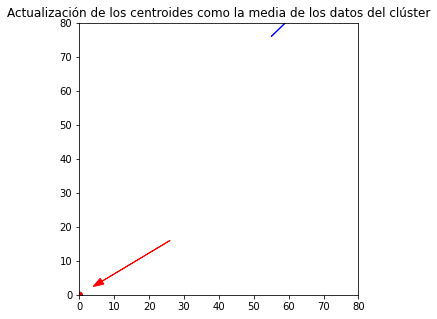

In [31]:
import copy
 
old_centroids = copy.deepcopy(centroids)
 
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x1'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['x2'])
    return k
 
centroids = update(centroids)
     
fig = plt.figure(figsize=(5, 5))
ax = plt.axes()
plt.scatter(df['x1'], df['x2'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Actualización de los centroides como la media de los datos del clúster')
plt.xlim(0, 80)
plt.ylim(0, 80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

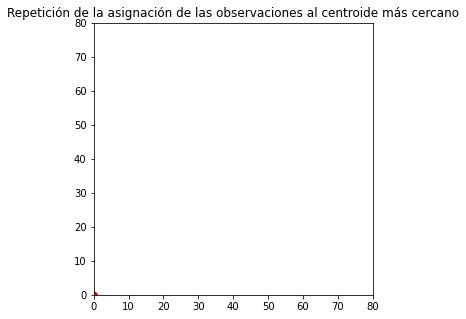

In [37]:
df = asignacion(df, centroids)
 
# Representación de resultados
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x1'], df['x2'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Repetición de la asignación de las observaciones al centroide más cercano')
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

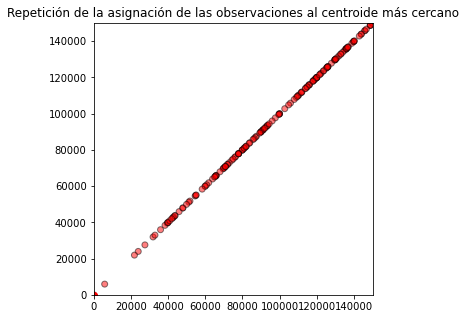

In [36]:
df = asignacion(df, centroids)
 
# Representación de resultados
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x1'], df['x2'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.title(u'Repetición de la asignación de las observaciones al centroide más cercano')
plt.xlim(0, 150000)
plt.ylim(0, 150000)
plt.show()

In [ ]:
##Explorar el uso de modelos más utilizados en la industria de seguros
##Según el analisis del trabajo Big data en el sector de seguros, los modelos mas utilizados son para los modelos no supervisados
## el análisis de componentes principales y el analisis cluster, para los supervisados serian las máquinas de vectores de soporte
## las redes neuronales y la regresion logistica, cabe destacar que estos son los mas utilizados.

In [ ]:
##Pasos requeridos para la industrialización de modelos
#Para industrializar un modelo se debe definir muy bien los parametros, analizar y describir los casos en los que fue probado, y 
#que ha dado mejores resultados, se debe limpiar muy bien el codigo y ser entendible en general en caso de modificaciones u opti
#mizaciones para ciertos casos.